Dataset link: https://data.world/raghu543/credit-card-fraud-data

The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we don't have the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score #recall_score, precision_recall_curve, auc, 
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
df = pd.read_csv("D:\CHIRAG\Credit card fraud detection\creditcard.csv")
#df = df.drop('Time', axis = 1) 
df["Normalized Amount"] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
Class = [len(df.loc[df.Class == 1]), len(df.loc[df.Class == 0])]
pd.Series(Class, index = ['Fraudulent', 'Non-fraudulent'], name = 'target')

Fraudulent           492
Non-fraudulent    284315
Name: target, dtype: int64

In [5]:
#Percentage of minority(fraudulent) class
print('% of Fraudulent Class = {:.3f}%'.format(len(df[df.Class == 1])*100 / len(df)))

% of Fraudulent Class = 0.173%


Accuracy = TP+TN/Total data

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

Now for our case recall will be a better option because in these case no. of normal transacations is very high than the no. of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

In [4]:
def model(clf) :
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
    print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
    print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, pred)))
    #Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, pred)
    print("Recall =", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("TP =", cnf_matrix[1,1])
    print("TN =", cnf_matrix[0,0])
    print("FP =", cnf_matrix[0,1])
    print("FN =", cnf_matrix[1,0])
    sns.heatmap(cnf_matrix, cmap = "coolwarm_r", annot = True)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()
    print("____________________CLASSIFICATION REPORT____________________")
    print(classification_report(y_test, model.predict(X_test)))

In [42]:
X = df.drop(columns = 'Class')
y = df['Class']
#First split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#For LGB split data into train and validation
X1_train, X_valid, y1_train, y_valid = train_test_split(X_train, y_train, random_state = 0)

Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.862472
Recall = 0.725
TP = 87
TN = 71078
FP = 4
FN = 33


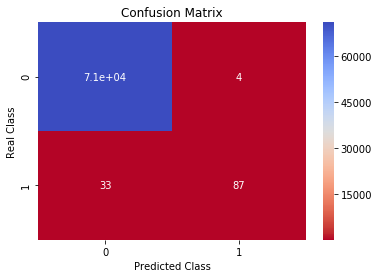

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.96      0.72      0.82       120

avg / total       1.00      1.00      1.00     71202



In [43]:
model(RandomForestClassifier(random_state = 0))

Training Accuracy = 0.999
Test Accuracy = 0.999
ROC_AUC_score : 0.849880
Recall = 0.7
TP = 84
TN = 71065
FP = 17
FN = 36


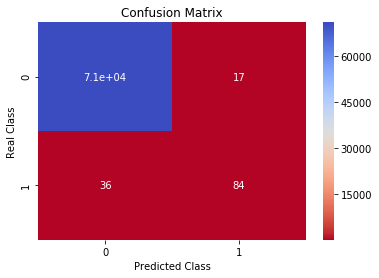

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.83      0.70      0.76       120

avg / total       1.00      1.00      1.00     71202



In [70]:
model(AdaBoostClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 1.000


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 1.000
ROC_AUC_score : 0.887444
Recall = 0.775
TP = 93
TN = 71074
FP = 8
FN = 27


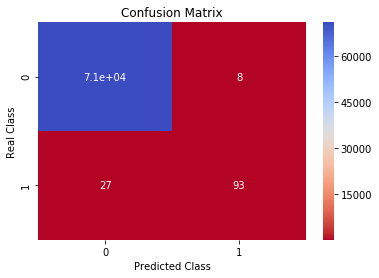

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.92      0.78      0.84       120

avg / total       1.00      1.00      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
model(XGBClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 1.000


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.999
ROC_AUC_score : 0.904061
Recall = 0.8083333333333333
TP = 97
TN = 71067
FP = 15
FN = 23


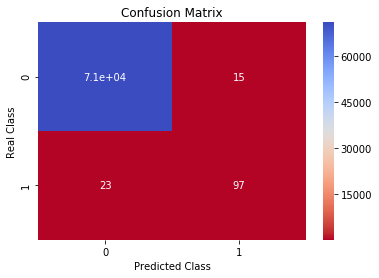

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.87      0.81      0.84       120

avg / total       1.00      1.00      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
model(lgb.LGBMClassifier(learning_rate= 0.03,
                         boosting= 'gbdt',
                         objective= 'binary',
                         metric= 'binary_logloss',
                         max_depth= 5,
                         num_leaves= 15, #default 31 and ideally should be <= 2^(max_depth)
                         min_child_samples= 100,  
                         max_bin= 100,
                         subsample= 0.7,
                         subsample_freq= 1,
                         colsample_bytree= 0.7,
                         seed= 0))

### LGB(Another Method(same result but works faster))

In [6]:
def lgbmodel(params, prob_limit):
    lgb_model = lgb.train(params, train_set = lgb.Dataset(X_train, label = y_train),
                           verbose_eval = 10)
    y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
    for i in range(len(y_pred)):
        if y_pred[i] >= prob_limit:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    print("Test Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
    #Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print("Recall =", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("TP =", cnf_matrix[1,1])
    print("TN =", cnf_matrix[0,0])
    print("FP =", cnf_matrix[0,1])
    print("FN =", cnf_matrix[1,0])
    sns.heatmap(cnf_matrix, cmap = "Blues", annot = True, linewidths = 0.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()
    print("____________________CLASSIFICATION REPORT____________________")
    print(classification_report(y_test, y_pred))
    #lgb.plot_importance(fit_model)

THRESHOLD = 0.50
Test Accuracy = 0.999
ROC_AUC_score : 0.895679
Recall = 0.7916666666666666
TP = 95
TN = 71060
FP = 22
FN = 25


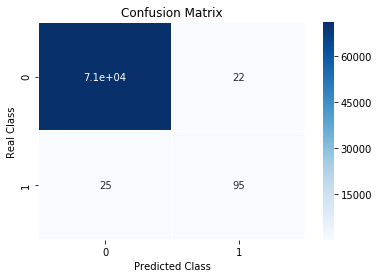

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.81      0.79      0.80       120

avg / total       1.00      1.00      1.00     71202

THRESHOLD = 0.05
Test Accuracy = 0.993
ROC_AUC_score : 0.913389
Recall = 0.8333333333333334
TP = 100
TN = 70616
FP = 466
FN = 20


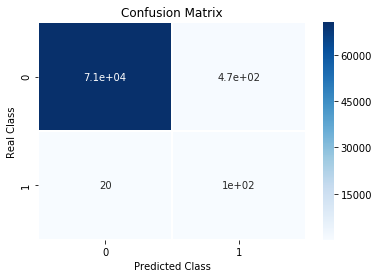

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.18      0.83      0.29       120

avg / total       1.00      0.99      1.00     71202



In [11]:
params = {
    'learning_rate': 0.03, 
    'boosting': 'dart', 
    'objective': 'binary', 
    'metric': 'auc', #using binary_logloss gave same results
    'max_depth': 5,  
    'num_leaves': 15, #default 31 and idealy should be <= 2^(max_depth)
    #'min_child_samples': 100,  
    'max_bin': 100,  
    'subsample': 0.7,  
    'subsample_freq': 1,  
    'colsample_bytree': 0.7,
    'seed': 0
}
print('THRESHOLD = 0.50')
lgbmodel(params = params, prob_limit = 0.50)
print('THRESHOLD = 0.05')
lgbmodel(params, prob_limit = 0.05)

THRESHOLD = 0.50
Test Accuracy = 0.999
ROC_AUC_score : 0.904061
Recall = 0.8083333333333333
TP = 97
TN = 71067
FP = 15
FN = 23


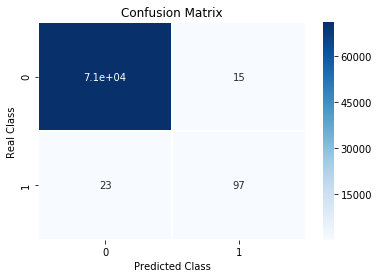

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.87      0.81      0.84       120

avg / total       1.00      1.00      1.00     71202

THRESHOLD = 0.05
Test Accuracy = 0.999
ROC_AUC_score : 0.916357
Recall = 0.8333333333333334
TP = 100
TN = 71038
FP = 44
FN = 20


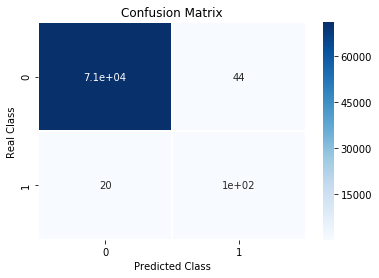

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.69      0.83      0.76       120

avg / total       1.00      1.00      1.00     71202



In [16]:
params = {
    'learning_rate': 0.03, 
    'boosting': 'gbdt', 
    'objective': 'binary', 
    'metric': 'binary_logloss', 
    'max_depth': 5,  
    'num_leaves': 15,
    'min_child_samples': 100,  
    'max_bin': 100,  
    'subsample': 0.7,  
    'subsample_freq': 1,  
    'colsample_bytree': 0.7,
    'seed': 0
}
print('THRESHOLD = 0.50')
lgbmodel(params = params, prob_limit = 0.50)
print('THRESHOLD = 0.05')
lgbmodel(params, prob_limit = 0.05)

1. Learning rate 0.03 gave the best result so I kept learning rate 0.03 for both.
2. Choosing boosting method as gbdt performed well as compared to dart as gbdt gives both recall as well as precision better for fraudulent class. Also another point to notice is that, when threshold was kept 0.05, both boosting method gave same recall but precision of gbdt was much better than dart. This means thar gbdt classifies non-fraudulent class correctly with more probability as compared to dart. Thus it proves that gbdt is stronger classifier than dart for this dataset.
3. Now looking at threshold results of gbdt boosting method, there are 20 cases where model is predicting fraudulent class as non-fraudulent with more than 95% probability. This suggests that those 20 cases are somewhat tough for any classifer to predict it as fraudulent and all the classifiers work almost same and make same kind of mistakes.
4. Now further decreasing the threshold value will definately decrease the precision level of classifier which is second but another important consideration for us(i.e., achieving high recall with maintaining better precision).
5. Now, if the aim is to predict all the fraudulent class irrespective of maintaining precision, value of threshold should be kept very low. But still it's not logically any more as FP value will be very high.

THRESHOLD = 0.02
Test Accuracy = 0.999
ROC_AUC_score : 0.920334
Recall = 0.8416666666666667
TP = 101
TN = 71011
FP = 71
FN = 19


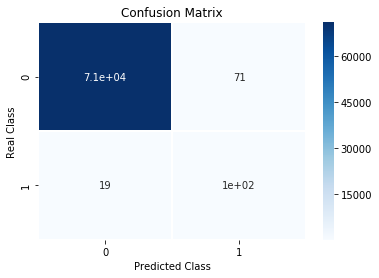

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.59      0.84      0.69       120

avg / total       1.00      1.00      1.00     71202

THRESHOLD = 0.003
Test Accuracy = 0.995
ROC_AUC_score : 0.926648
Recall = 0.8583333333333333
TP = 103
TN = 70724
FP = 358
FN = 17


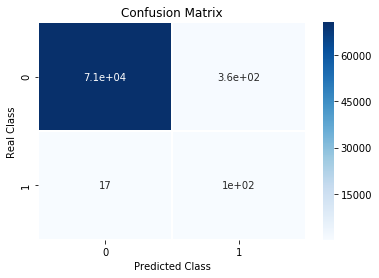

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.22      0.86      0.35       120

avg / total       1.00      0.99      1.00     71202

THRESHOLD = 0.001
Test Accuracy = 0.975
ROC_AUC_score : 0.946024
Recall = 0.9166666666666666
TP = 110
TN = 69332
FP = 1750
FN = 10


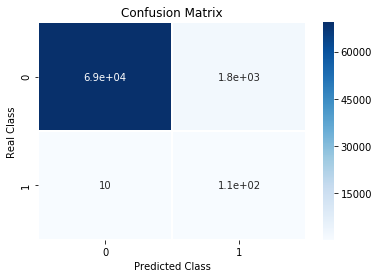

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     71082
          1       0.06      0.92      0.11       120

avg / total       1.00      0.98      0.99     71202



In [17]:
print('THRESHOLD = 0.02')
lgbmodel(params, prob_limit = 0.02)
print('THRESHOLD = 0.003')
lgbmodel(params, prob_limit = 0.003)
print('THRESHOLD = 0.001')
lgbmodel(params, prob_limit = 0.001)

Above we can see with more than 99.7% probability, classifier is predicting 17 fraudulent cases as non-fraudulent and with 99.9% probability, 10 cases.

The point here is that all these cases/records will be very difficult for any boosting model to predict correctly as fraudulent even if we use best parameters using hyper-parameter tuning and Grid Search. Thus we should try some another way to train the model i.e., to transform data as much as possible and make it easy for classifier to learn. Now, problem faced here in credit card fraud detection is we don't have a dataset with its features (due to privacy issues). Thus, feature engineering is not possible here in this dataset.

Another very important thing is the dataset is highly imbalanced. Thus, only boosting can perform some what good here and no another models (trees).

So, let's balance the dataset using different techniques and look if it makes some difference here.

###### Note: Here I have used probability method of LGB only and not all as xgboost and lgb both gives almost same results (xgboost performiing some what well in most cases) but lgb takes very less computational time as compared to xgboost. Also, xgboost performed well as compare to AdaBoost so we will not use AdaBoost further here.

# Data Balancing

### Down-Sampling

In [16]:
train_majority = df[df.Class == 0]
train_minority = df[df.Class == 1]
train_majority_downsampled = resample(train_majority, replace = False, n_samples = 492, random_state = 0)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

In [17]:
X = train_downsampled.drop(columns = 'Class')
y = train_downsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Training Accuracy = 0.996
Test Accuracy = 0.927
ROC_AUC_score : 0.928605
Recall = 0.8740157480314961
TP = 111
TN = 117
FP = 2
FN = 16


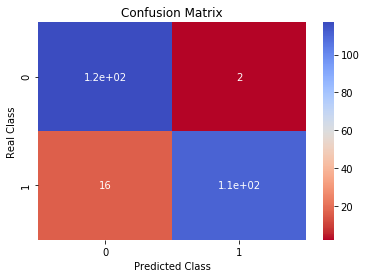

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       119
          1       0.98      0.87      0.92       127

avg / total       0.93      0.93      0.93       246



In [18]:
model(RandomForestClassifier(random_state = 0))

Although now dataset is balanced so it will nor give higher weights to the fraulent class, still let's see if it performs well on a balanced dataset.

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.999
Test Accuracy = 0.943
ROC_AUC_score : 0.943823
Recall = 0.9212598425196851
TP = 117
TN = 115
FP = 4
FN = 10


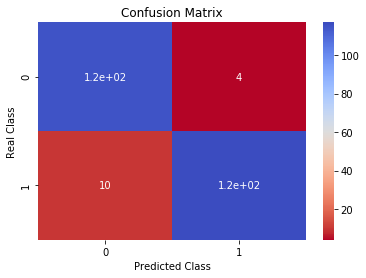

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       119
          1       0.97      0.92      0.94       127

avg / total       0.94      0.94      0.94       246



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.923
ROC_AUC_score : 0.924403
Recall = 0.8740157480314961
TP = 111
TN = 116
FP = 3
FN = 16


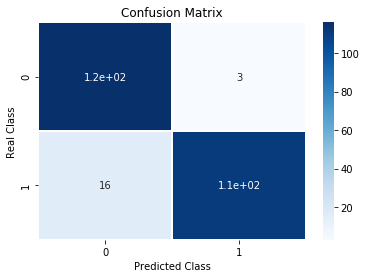

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       119
          1       0.97      0.87      0.92       127

avg / total       0.93      0.92      0.92       246



In [21]:
lgbmodel(params, 0.50)

Down-Sampling gives high prediction and recall but the main disadvantage of this is that it will lose a lot of useful information from the dataset as it is removing more than 99% of non-fraudulent cases from the dataset. Thus, this should not be a practical approach here.

Moreover, xgboost performed very well here as compared to RF and LGB.

### Up-Sampling

In [22]:
#Note in up sampling, first split the minority class data into train and test set and then up-sample the train data and test it with test data
X = df.drop(columns = 'Class')
y = df['Class']
#First split data into train and test
X_train_us, X_test, y_train_us, y_test = train_test_split(X, y, random_state = 0)
#Now resample the train data
df_us = pd.concat([X_train_us, y_train_us], axis = 1)
train_majority = df_us[df_us.Class == 0]
train_minority = df_us[df_us.Class == 1]
train_majority.shape

(213233, 30)

In [23]:
train_minority_upsampled = resample(train_minority, replace = True, n_samples = 213233, random_state = 0)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
X_train = train_upsampled.drop(columns = 'Class')
y_train = train_upsampled['Class']

Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.891617
Recall = 0.7833333333333333
TP = 94
TN = 71075
FP = 7
FN = 26


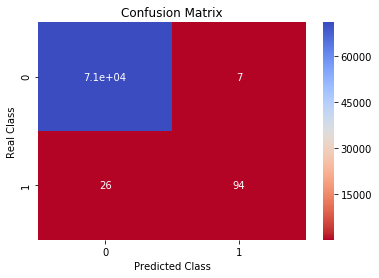

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.93      0.78      0.85       120

avg / total       1.00      1.00      1.00     71202



In [37]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.998


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.995
ROC_AUC_score : 0.926845
Recall = 0.8583333333333333
TP = 103
TN = 70752
FP = 330
FN = 17


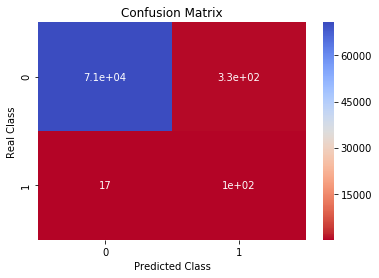

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.24      0.86      0.37       120

avg / total       1.00      1.00      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
model(XGBClassifier(random_state= 0))

Test Accuracy = 0.994
ROC_AUC_score : 0.930449
Recall = 0.8666666666666667
TP = 104
TN = 70672
FP = 410
FN = 16


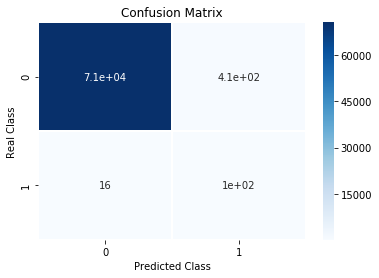

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.20      0.87      0.33       120

avg / total       1.00      0.99      1.00     71202



In [31]:
lgbmodel(params, 0.50)

Boosting method performed well here but in terms of recall only(very low precision). RF gave high precision with slightly low recall. Also F1-score is high for RF.

Now, the down side of this method here is up-sampling will restrict learning of models due to repeatation of fraudulent cases so many times and eventually will overfit also. Also it costs us very expensive computationally.

Another famous data balancing technique is using SMOTE family. Let's apply them

## SMOTE FAMILY

### 1. SMOTE Regular

In [39]:
sm = SMOTE(random_state = 0)
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.920728
Recall = 0.8416666666666667
TP = 101
TN = 71067
FP = 15
FN = 19


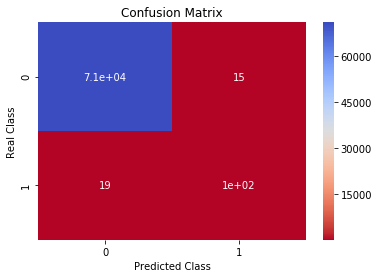

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.87      0.84      0.86       120

avg / total       1.00      1.00      1.00     71202



In [45]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.981


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.989
ROC_AUC_score : 0.932288
Recall = 0.875
TP = 105
TN = 70341
FP = 741
FN = 15


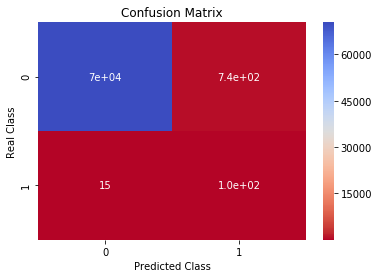

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     71082
          1       0.12      0.88      0.22       120

avg / total       1.00      0.99      0.99     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.991
ROC_AUC_score : 0.932857
Recall = 0.875
TP = 105
TN = 70422
FP = 660
FN = 15


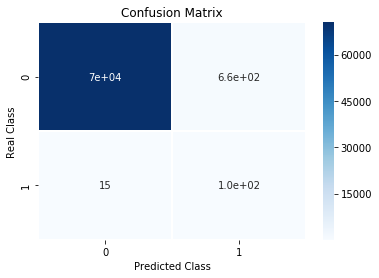

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.14      0.88      0.24       120

avg / total       1.00      0.99      0.99     71202



In [46]:
lgbmodel(params, 0.50)

RF performed very well here. It gives better recall with maintaining precision and F1-score. Boosting gives high recall but with worst precision and F1-score.

### 2. SMOTE BorderLine 1

In [19]:
sm = SMOTE(random_state = 0, kind = 'borderline1')
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.887437
Recall = 0.775
TP = 93
TN = 71073
FP = 9
FN = 27


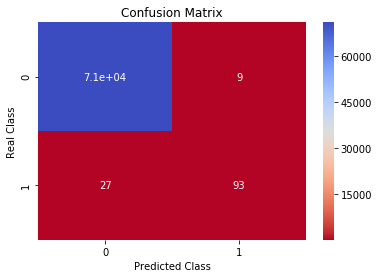

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.91      0.78      0.84       120

avg / total       1.00      1.00      1.00     71202



In [20]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.999


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.997
ROC_AUC_score : 0.923727
Recall = 0.85
TP = 102
TN = 70901
FP = 181
FN = 18


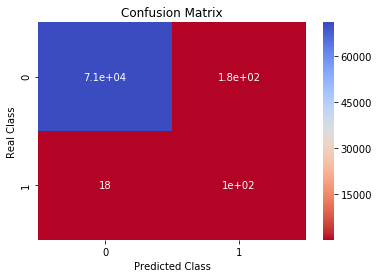

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.36      0.85      0.51       120

avg / total       1.00      1.00      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.996
ROC_AUC_score : 0.931504
Recall = 0.8666666666666667
TP = 104
TN = 70822
FP = 260
FN = 16


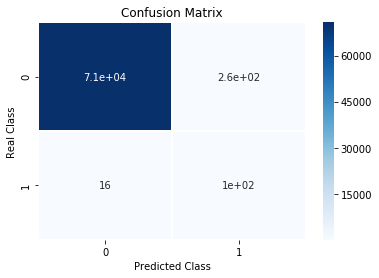

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.29      0.87      0.43       120

avg / total       1.00      1.00      1.00     71202



In [48]:
lgbmodel(params, 0.50)

### 3. SMOTE BorderLine 2

In [49]:
sm = SMOTE(random_state = 0, kind = 'borderline2')
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.891547
Recall = 0.7833333333333333
TP = 94
TN = 71065
FP = 17
FN = 26


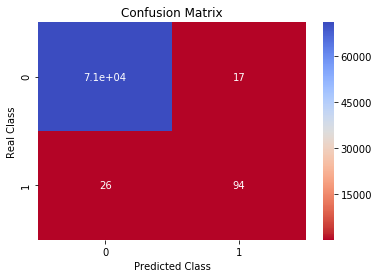

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.85      0.78      0.81       120

avg / total       1.00      1.00      1.00     71202



In [26]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.996


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.995
ROC_AUC_score : 0.930885
Recall = 0.8666666666666667
TP = 104
TN = 70734
FP = 348
FN = 16


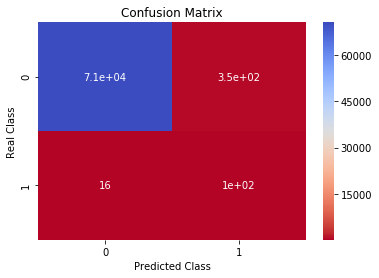

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.23      0.87      0.36       120

avg / total       1.00      0.99      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [27]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.991
ROC_AUC_score : 0.937249
Recall = 0.8833333333333333
TP = 106
TN = 70454
FP = 628
FN = 14


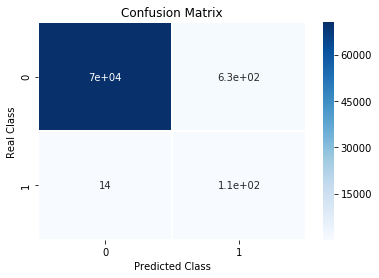

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.14      0.88      0.25       120

avg / total       1.00      0.99      0.99     71202



In [ ]:
lgbmodel(params, 0.50)

Both borderline method performed same as upsampling in terms of recall. Further precision and F1-score of boosters is improved as compared to up-sampling. Borderline 2 gives better precision and F1-score than borderline 1.

### 4. SMOTE SVM

In [7]:
sm = SMOTE(random_state = 0, kind = 'svm')
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.916582
Recall = 0.8333333333333334
TP = 100
TN = 71070
FP = 12
FN = 20


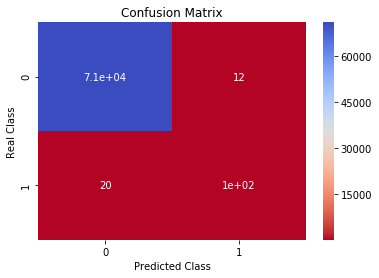

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.89      0.83      0.86       120

avg / total       1.00      1.00      1.00     71202



In [30]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.999


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.998
ROC_AUC_score : 0.928161
Recall = 0.8583333333333333
TP = 103
TN = 70939
FP = 143
FN = 17


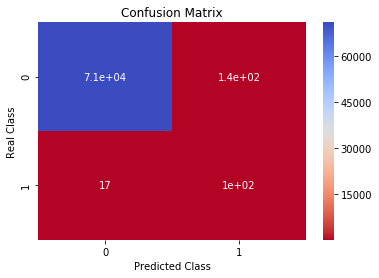

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.42      0.86      0.56       120

avg / total       1.00      1.00      1.00     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.997
ROC_AUC_score : 0.931758
Recall = 0.8666666666666667
TP = 104
TN = 70858
FP = 224
FN = 16


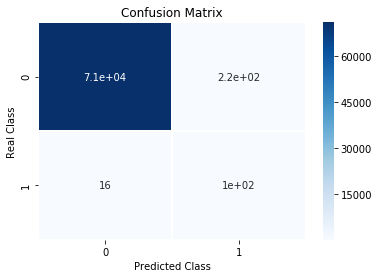

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.32      0.87      0.46       120

avg / total       1.00      1.00      1.00     71202



In [10]:
lgbmodel(params, 0.50)

RF performed very well giving high recall, precision and F1-score. Boosters again gave good recall but with compromising precision and F1-score.

### ADASYN

In [11]:
adasyn = ADASYN(random_state = 0)
X = df.drop(columns = 'Class')
y = df['Class']
X_train_as, X_test, y_train_as, y_test = train_test_split(X, y, random_state = 0)
X_train, y_train = adasyn.fit_sample(X_train_as, y_train_as)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426479, 29), (71202, 29), (426479,), (71202,))

Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.895700
Recall = 0.7916666666666666
TP = 95
TN = 71063
FP = 19
FN = 25


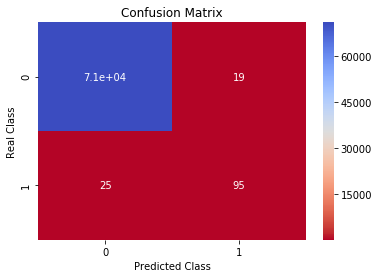

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.83      0.79      0.81       120

avg / total       1.00      1.00      1.00     71202



In [41]:
model(RandomForestClassifier(random_state = 0))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy = 0.973


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy = 0.964
ROC_AUC_score : 0.923983
Recall = 0.8833333333333333
TP = 106
TN = 68568
FP = 2514
FN = 14


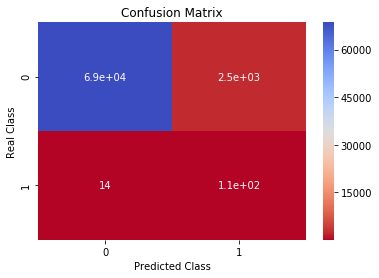

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.88      0.08       120

avg / total       1.00      0.96      0.98     71202



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
model(XGBClassifier(random_state = 0))

Test Accuracy = 0.963
ROC_AUC_score : 0.935871
Recall = 0.9083333333333333
TP = 109
TN = 68481
FP = 2601
FN = 11


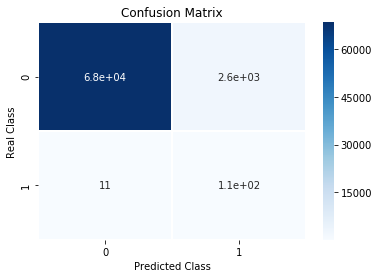

____________________CLASSIFICATION REPORT____________________
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.91      0.08       120

avg / total       1.00      0.96      0.98     71202



In [12]:
lgbmodel(params, 0.50)

RF again gave good overall performance. Boosters gave high recall but with worst precision and F1-score. Further, LGB performed well than XGB.

##### RESULTS & CONCLUSIONS:
1. Random forest performed best when data was balanced using SMOTE Regular and SMOTE SVC(took more time to balance the dataset).
2. For imbalanced data boosting performed well.
3. Also there is almost same result with RandomForest with SMOTE Regular & SVC and LGB(imbalanced dataset).
4. When dataset was balanced through different techniques, boosting gave increased recall value and gave low/worst precision and F1 value. When dataset was imbalanced, it maintained precision and F1-score with good but slighlty low recall value. Thus this can be concluded that boosting perfomed slightly better after balancing the dataset.
5. Both xgboost and lgb gave almost same results. But, lgb took very less computational time as compared to xgboost. Thus, we should use xgboost for smaller dataset. But if dataset is large lgb should be preffered.

##### FURTHER WORK:
1. Here I have only compared different data balancing techniques with different models with default parameters. Further, we can look at different parameters of both data balancing techniques and models for better performance. I tried here a little bit (changing number of nearest neighbours to use to construct synthetic samples, number of trees, learning_rate, etc.) but the results were almost same and even better for default parameters. One of the reason besides this is due to those 18-20 fraudulent records which where predicted as non-fraudulent by the classifier with more than 95% probability (LGB used above). In this case it becomes very tough for any classifier to predict them correctly.
2. One of the limitation of this project was the unavailability of raw credit-card fraud detection dataset i.e, features. If features are available, we can try feature engineering here (polynomials, interactions, etc.).